 # Online Retail

## Descripción general

Este es un conjunto de datos transaccionales que contiene todas las transacciones ocurridas entre el 01/12/2010 y el 09/12/2011 para una tienda en línea registrada en el Reino Unido. La empresa se dedica principalmente a la venta de regalos únicos para toda ocasión. Muchos de los clientes de la empresa son mayoristas.

Características del Dataset:
- Tipo: Multivariante, Secuencial, Series de Tiempo
- Área de Estudio: Negocios
- Tareas Asociadas: Clasificación, Agrupamiento (Clustering)
- Tipo de Características: Entero, Real
- Instancias: 541,909
- Características: 8

Enlace del Dataset:
- https://archive.ics.uci.edu/dataset/352/online+retail
- https://www.kaggle.com/datasets/vijayuv/onlineretail?resource=download

## Carga de los datos

Librerias necesarias

In [ ]:
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

Conexión del drive en el colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Especificamos la ruta de acceso

In [ ]:
rutaArchivo = "/content/drive/MyDrive/datasets/online retail/csv/OnlineRetail.csv"

Cargamos los datos en un Dataframe

In [ ]:
onlineRetail = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')

## Primera exploración de los datos

### ¿Qué columnas existen y qué representan?

In [ ]:
onlineRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Metadata

Podemos identificar que:
- InvoiceNo (Nominal, Discreto): Un número entero de 6 dígitos asignado de forma única a cada transacción. Si este código empieza con la letra «c», indica una cancelación.
- StockCode (Nominal): Un número entero de 5 dígitos asignado de forma única a cada producto distinto	.
- Description (Nominal): Nombre del producto.
- Quantity (Numérico, Discreto): Las cantidades de cada producto (**artículo**) por transacción.
- InvoiceDate (Numérico): El día y la hora en que se generó cada transacción, va desde la fecha **2010-12-01**, hasta la fecha **2011-12-09**.
- UnitPrice (Numérico, Continuo): Precio unitario del producto, **libra esterlina**.
- CustomerID (Nominal, Discreto): Un número integral de 5 dígitos asignado de forma única a cada cliente.
- Country (Nominal): El nombre del país donde reside cada cliente.

### ¿Qué tipo de datos contiene cada columna?

In [ ]:
# dtypes nos muestra el tipo de dato de cada columna en un Dataframe
onlineRetail.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Podemos identificar que:
- InvoiceNo: object (Texto o cadena)
- StockCode: object (Texto o cadena)
- Description: object (Texto o cadena)
- Quantity: int64 (Número entero)
- InvoiceDate: object (Fecha y hora)
- UnitPrice: float64 (Número de punto flotante)
- CustomerID: float64 (Número de punto flotante)
- Country: object (Texto o cadena)

## Identificar problemas en los datos

¿Hay valores duplicados, faltantes o datos inconsistentes?

### Eliminación de valores duplicados

In [ ]:
def mapaDuplicadosTodas(df, sample_size=200):
    duplicados = df[df.duplicated(keep=False)]
    if duplicados.empty:
        print("No hay duplicados en el DataFrame.")
        return

    # Tomamos muestra si son demasiados duplicados
    if len(duplicados) > sample_size:
        duplicados = duplicados.sample(sample_size, random_state=42)

    # Matriz booleana: celdas duplicadas
    mask = duplicados.apply(lambda col: col.duplicated(keep=False))

    plt.figure(figsize=(12,6))
    sns.heatmap(mask, cmap="Reds", cbar=False, linewidths=0.5)
    plt.title("Mapa de duplicados")
    plt.xlabel("Columnas")
    plt.ylabel("Filas duplicadas")
    plt.show()

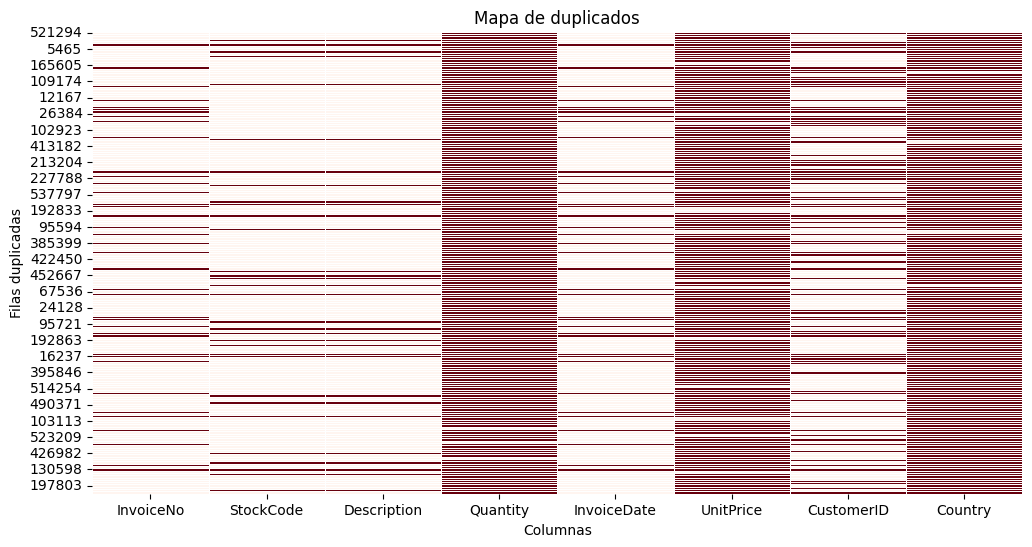

In [ ]:
mapaDuplicadosTodas(onlineRetail)

Eliminamos valores duplicados en el DataFrame:

In [ ]:
def mostrarDuplicados(df):
    numDuplicados = df.duplicated().sum()
    print(f"Cantidad de filas duplicadas: {numDuplicados}")

Obtenemos el número de duplicados

In [ ]:
mostrarDuplicados(onlineRetail)

Cantidad de filas duplicadas: 5268


Eliminamos los duplicados

In [ ]:
onlineRetail.drop_duplicates(inplace=True)

Verificamos:

In [ ]:
mostrarDuplicados(onlineRetail)

Cantidad de filas duplicadas: 0


In [ ]:
mapaDuplicadosTodas(onlineRetail)

No hay duplicados en el DataFrame.


### Eliminación de valores con codigo de factura C

Obtenemos un historico de facturas canceladas vs normales

In [ ]:
#count_canceladas = onlineRetail['InvoiceNo'].str.startswith('C', na=False).value_counts()
#plt.figure(figsize=(6,4))
#plt.bar(['No', 'Sí'], [count_canceladas[False], count_canceladas[True]], color=['blue', 'red'])
#plt.ylabel('Número de filas')
#plt.title('Número de facturas canceladas vs no canceladas')
#plt.show()

Ejecutamos:

In [ ]:
initial_rows = onlineRetail.shape[0]
onlineRetail = onlineRetail[~onlineRetail['InvoiceNo'].str.startswith('C', na=False)]
rows_after_filtering = onlineRetail.shape[0]
rows_removed = initial_rows - rows_after_filtering
print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

Se eliminaron 9251 filas con InvoiceNo comenzando con 'C'.


Verificamos:

In [ ]:
#initial_rows = onlineRetail.shape[0]
#rows_to_remove = onlineRetail['InvoiceNo'].str.startswith('C', na=False).sum()
#if rows_to_remove == 0:
#    print("No hay facturas canceladas (InvoiceNo comenzando con 'C').")
#else:
#    onlineRetail = onlineRetail[~onlineRetail['InvoiceNo'].str.startswith('C', na=False)]
#    rows_after_filtering = onlineRetail.shape[0]
#    rows_removed = initial_rows - rows_after_filtering
#    print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

### Valores faltantes

Podemos identificar si existen datos faltantes en todas las columnas

In [ ]:
def verificarNulos(dataFrame):
    dfNulos = dataFrame.isnull().sum()
    dfNulos = dfNulos.reset_index()
    dfNulos.columns = ['Columna', 'NumeroDeValoresNulos']
    return dfNulos

Ejecutamos:

In [ ]:
verificarNulos(onlineRetail)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,134658
7,Country,0


graficamos un mapa de los valores nulos (bloques)

In [ ]:
def mapaNulosTodas(df, sample_size=200):
    nulos = df[df.isnull().any(axis=1)]
    if nulos.empty:
        print("No hay valores nulos en el DataFrame.")
        return
    if len(nulos) > sample_size:
        nulos = nulos.sample(sample_size, random_state=42)
    mask = nulos.isnull()
    plt.figure(figsize=(12,6))
    sns.heatmap(mask, cmap="Blues", cbar=False, linewidths=0.5)
    plt.title("Mapa de valores nulos")
    plt.xlabel("Columnas")
    plt.ylabel("Filas con nulos")
    plt.show()

Ejecutamos:

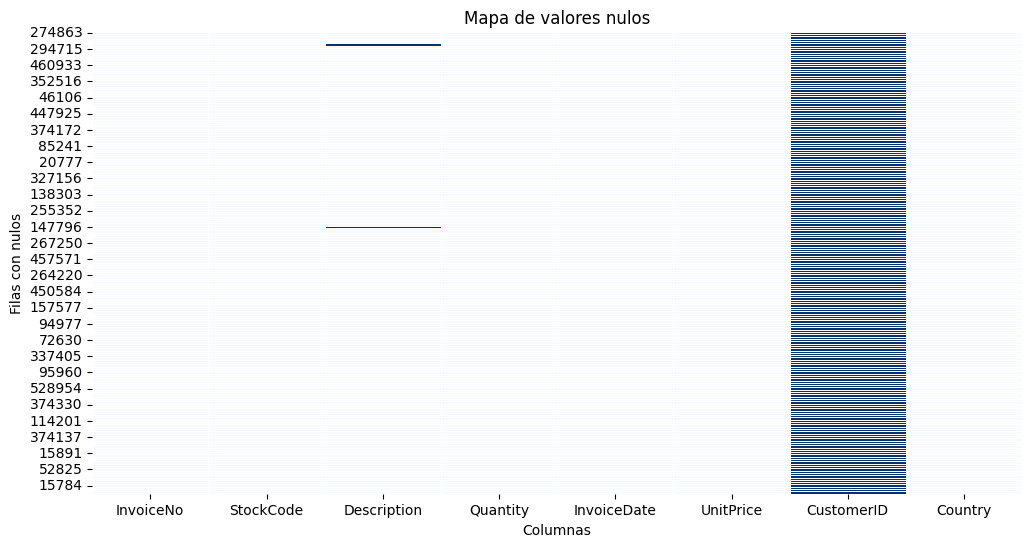

In [ ]:
mapaNulosTodas(onlineRetail)

Hacemos un pequeño escaneo:

In [ ]:
print(onlineRetail['Description'].value_counts())

Description
WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
damages/credits from ASOS.               1
dotcom adjust                            1
CAT WITH SUNGLASSES BLANK CARD           1
WATERING CAN SINGLE HOOK PISTACHIO       1
COUNTRY COTTAGE  DOORSTOP GREEN          1
Name: count, Length: 4207, dtype: int64


#### Hipotesis de un valor faltante (CustomerID)

Observamos algo en particular, las ultimos valores de las descripciones tienen un código en particular, ¿Será el CustomerID?, ¿Será que, la fila específica de esa descripción, el CustomerID es NaN?

In [ ]:
# Definimos una función en la cual nos muestre todos los atributos/valores dado el producto
def buscarFilaPorDescripcion(dataFrame, descripcion):
    resultado = dataFrame[dataFrame['Description'].str.contains(descripcion, case=False, na=False)]
    print(resultado)

In [ ]:
buscarFilaPorDescripcion(onlineRetail, 'SET 10 CARD CHRISTMAS STAMPS 16963')

       InvoiceNo StockCode                         Description  Quantity  \
478073    577078     23652  SET 10 CARD CHRISTMAS STAMPS 16963         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
478073  11/17/2011 15:17       2.91         NaN  United Kingdom  


Encontramos que para SET 10 CARD CHRISTMAS STAMPS 16963, su CostumerID es nulo (NaN)...

¿Podemos demostrarlo?

Generalmente pienso que, por alguna razón, el CustomerID, se concatenó con la descripción del producto, por ello, existen 132220 productos con CustomerID NaN

In [ ]:
# Definimos una función en la cual nos muestre graficamente el promedio de longitud del CustomerID
def analizarCustomerId(dataFrame):
    customersIds = dataFrame['CustomerID'].dropna()
    lengths = customersIds.apply(lambda x: len(str(int(x))))
    promedioDigitos = lengths.mean()

    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=range(1, int(lengths.max()) + 2), edgecolor='black')
    plt.title('Distribución de Longitudes de CustomerID')
    plt.xlabel('Número de Dígitos de CustomerID')
    plt.ylabel('Frecuencia')
    plt.xticks(range(1, int(lengths.max()) + 1))
    plt.grid(axis='y')
    plt.show()

    print(f"Promedio de dígitos en CustomerID (sin nulos): {promedioDigitos}")

# Definimos una función en la cual nos muestre graficamente la cantidad de CustomerID validos vs los CustomerID nulos (NaN)
def analizarNulosVsNoNulos(dataFrame):
    nulos = dataFrame['CustomerID'].isnull().sum()
    noNulos = len(dataFrame) - nulos

    plt.figure(figsize=(7, 5))
    plt.bar(['No Nulos', 'Nulos'], [noNulos, nulos], color=['blue', 'red'])
    plt.title('Cantidad de CustomerID Nulos vs No Nulos')
    plt.ylabel('Cantidad')
    plt.show()

    print(f"Cantidad de CustomerID Nulos: {nulos}")
    print(f"Cantidad de CustomerID No Nulos: {noNulos}")

Ejecutamos:

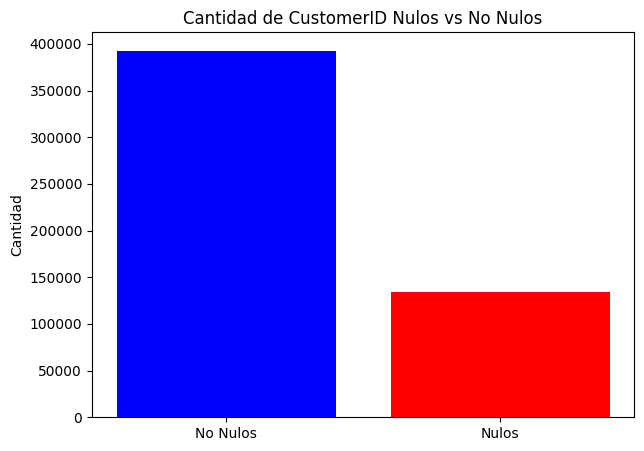

Cantidad de CustomerID Nulos: 134658
Cantidad de CustomerID No Nulos: 392732


In [ ]:
analizarNulosVsNoNulos(onlineRetail)

Ejecutamos:

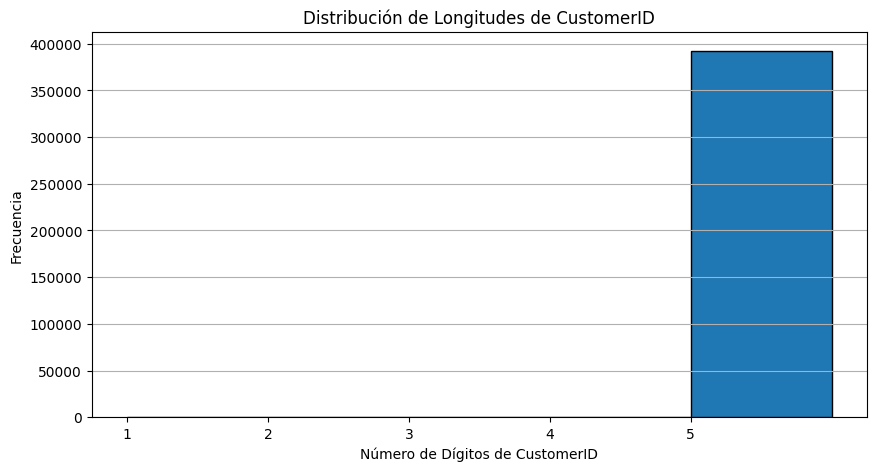

Promedio de dígitos en CustomerID (sin nulos): 5.0


In [ ]:
analizarCustomerId(onlineRetail)

In [ ]:
#Definimos una función que nos muestra graficamente la comparación entre la cantidad de nulos en CustomerID (NaN) vs la cantidad de descripciones que poseen el patron r'\d{5}'
def compararNulosYDescripcionesCodigo5Digitos(dataFrame, columnaCustomerId, columnaDescripcion):
    nulosCustomerId = dataFrame[columnaCustomerId].isnull().sum()
    patron = r'\d{5}'  # Coincide con 5 dígitos en cualquier parte de la cadena
    descripcionesFiltradas = dataFrame[dataFrame[columnaDescripcion].str.contains(patron, na=False)][columnaDescripcion]
    cantidadDescripciones = len(descripcionesFiltradas)

    plt.figure(figsize=(8, 5))
    plt.bar(['Nulos en CustomerID', 'Descripciones con 5 dígitos'], [nulosCustomerId, cantidadDescripciones], color=['red', 'blue'])
    plt.title('Comparación entre Nulos en CustomerID y Descripciones con Código de 5 Dígitos')
    plt.ylabel('Cantidad')
    plt.show()

    print(f"Cantidad de CustomerID nulos: {nulosCustomerId}")
    print(f"Cantidad de descripciones que contienen un código de 5 dígitos: {cantidadDescripciones}")

    return descripcionesFiltradas

Para que nuestra hipotesis sea correcta, el numero de nulos de CustomerID nulos (NaN) debe ser igual a las descripciones de 5 digitos encontradas....

Ejecutamos:

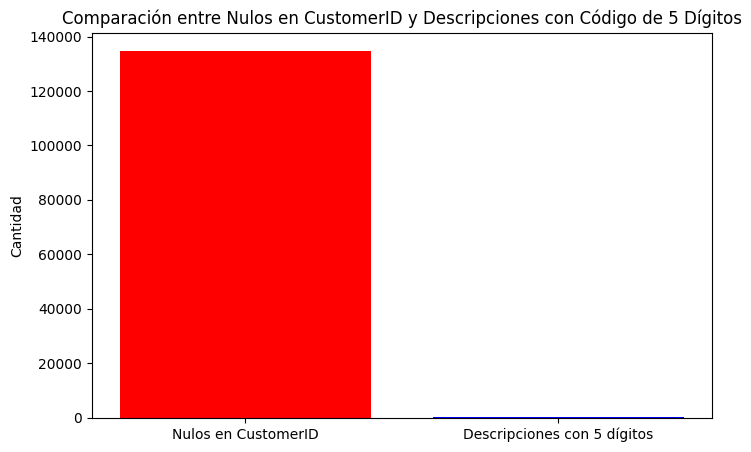

Cantidad de CustomerID nulos: 134658
Cantidad de descripciones que contienen un código de 5 dígitos: 236


In [ ]:
descripcionesCincoDigitos = compararNulosYDescripcionesCodigo5Digitos(onlineRetail, 'CustomerID', 'Description')

Ejecutamos:

In [ ]:
display(descripcionesCincoDigitos.head())

,Description
117894,wrong barcode (22467)
117895,wrongly sold (22719) barcode
140283,sold as 22467
203751,incorrectly credited C550456 see 47
203761,incorrectly credited C550456 see 47


Oh, el número de CustomerID nulos (NaN) es diferente a la cantidad de descripciones que poseen el patron **r'\d{5}'**, por lo cual, ¿Todas las descripciones que presenten el patron **r'\d{5}'** tienen su CustomerID nulo (NaN)?

In [ ]:
def verificarNulosPorDescripcion(descripcionesCincoDigitos, dataFrame, columnaCustomerId, columnaDescripcion):
    descripcionesFiltradas = dataFrame[dataFrame[columnaDescripcion].isin(descripcionesCincoDigitos)].copy()
    descripcionesConCustomerIdNoNulo = descripcionesFiltradas[descripcionesFiltradas[columnaCustomerId].notnull()]
    descripcionesConCustomerIdNulo = descripcionesFiltradas[descripcionesFiltradas[columnaCustomerId].isnull()]
    print(f"Cantidad de descripciones con 5 dígitos y CustomerID no nulo: {len(descripcionesConCustomerIdNoNulo)}")
    print(f"Cantidad de descripciones con 5 dígitos y CustomerID nulo: {len(descripcionesConCustomerIdNulo)}")
    return descripcionesConCustomerIdNoNulo, descripcionesConCustomerIdNulo

In [ ]:
descripcionesConCustomerIdNoNulo, descripcionesConCustomerIdNulo = verificarNulosPorDescripcion(descripcionesCincoDigitos, onlineRetail, 'CustomerID', 'Description')

Cantidad de descripciones con 5 dígitos y CustomerID no nulo: 1
Cantidad de descripciones con 5 dígitos y CustomerID nulo: 235


In [ ]:
descripcionesConCustomerIdNoNulo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
352930,567702,23630,SET 10 CARDS HANGING BAUBLES 17080,1,9/22/2011 9:38,2.99,15810.0,United Kingdom


In [ ]:
descripcionesConCustomerIdNulo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
117894,546407,22719,wrong barcode (22467),-178,3/11/2011 16:24,0.00,NaN,United Kingdom
117895,546408,22467,wrongly sold (22719) barcode,170,3/11/2011 16:25,0.00,NaN,United Kingdom
140283,548396,22719,sold as 22467,-25,3/30/2011 17:21,0.00,NaN,United Kingdom
203751,554550,47566B,incorrectly credited C550456 see 47,1300,5/25/2011 9:57,0.00,NaN,United Kingdom
203761,554553,47566B,incorrectly credited C550456 see 47,-1300,5/25/2011 9:59,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
540508,581492,23611,SET 10 CARDS RED RIDING HOOD 17214,3,12/9/2011 10:03,2.49,NaN,United Kingdom
540509,581492,23616,SET 10 CARDS JINGLE BELLS 17217,1,12/9/2011 10:03,2.49,NaN,United Kingdom
540510,581492,23621,SET 10 CARDS DAVID'S MADONNA 17074,3,12/9/2011 10:03,2.49,NaN,United Kingdom
540511,581492,23635,SET 10 CARDS CHRISTMAS HOLLY 17259,1,12/9/2011 10:03,4.16,NaN,United Kingdom


In [ ]:
buscarFilaPorDescripcion(onlineRetail, 'SET 10 CARDS HANGING BAUBLES 17080')

       InvoiceNo StockCode                         Description  Quantity  \
352930    567702     23630  SET 10 CARDS HANGING BAUBLES 17080         1   
515164    579777     23630  SET 10 CARDS HANGING BAUBLES 17080         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
352930    9/22/2011 9:38       2.99     15810.0  United Kingdom  
515164  11/30/2011 15:13       2.49         NaN  United Kingdom  


##### Conclusión

Conclusion, **no todas los productos que sigan el patron r'\d{5}' poseen CustomerID nulo (NaN)**
**Por lo tanto: nuestra anterior afirmación no es válida, claro, existen productos que poseen el patron, pero no necesariamente es su CustomerID**
Observamos que el producto SET 10 CARDS HANGING BAUBLES 17080 posee en la fila 352930 un CustomerID de 15810, no de 17080.

Entonces, podemos decidir descartar o no, los productos comprados con CustomerID nulo (NaN)

#### Eliminación de valores faltantes

Si no podemos identificar quién es cada cliente, no tiene sentido utilizar esos datos como datos de entrada.

Ejecutamos:

In [ ]:
onlineRetail.dropna(inplace=True)

Ejecutamos:

In [ ]:
verificarNulos(onlineRetail)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [ ]:
mapaNulosTodas(onlineRetail)

No hay valores nulos en el DataFrame.


### Valores inconsistentes

#### Evaluando si existen cantidades o precios inconsistentes

- Puede existir un Quantity (Cantidad) negativa o nula, por ejemplo: -9, 0, -1, etc.
- Puede existir un UnitPrice (Precio Unitario) negativo o nulo, por ejemplo: -8.1, 0, -1.3, etc.

In [ ]:
# Definimos 2 funciones:

# una funcion que muestre si existe cantidades negativas
def mostrarCantidadNegativa(dataFrame):
  return dataFrame[dataFrame["Quantity"] <= 0]["Quantity"]

# y otra que muestre si existe precios unitarios negativos
def mostrarPrecioUnitarioNegativo(dataFrame):
  return dataFrame[dataFrame["UnitPrice"] <= 0]["UnitPrice"]

Ejecutamos:

In [ ]:
mostrarCantidadNegativa(onlineRetail)

,Quantity


Ejecutamos:

In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail)

,UnitPrice
9302,0.0
33576,0.0
40089,0.0
47068,0.0
47070,0.0
56674,0.0
86789,0.0
130188,0.0
139453,0.0
145208,0.0


Graficamos los posibles valores inconsistentes en precios y cantidades

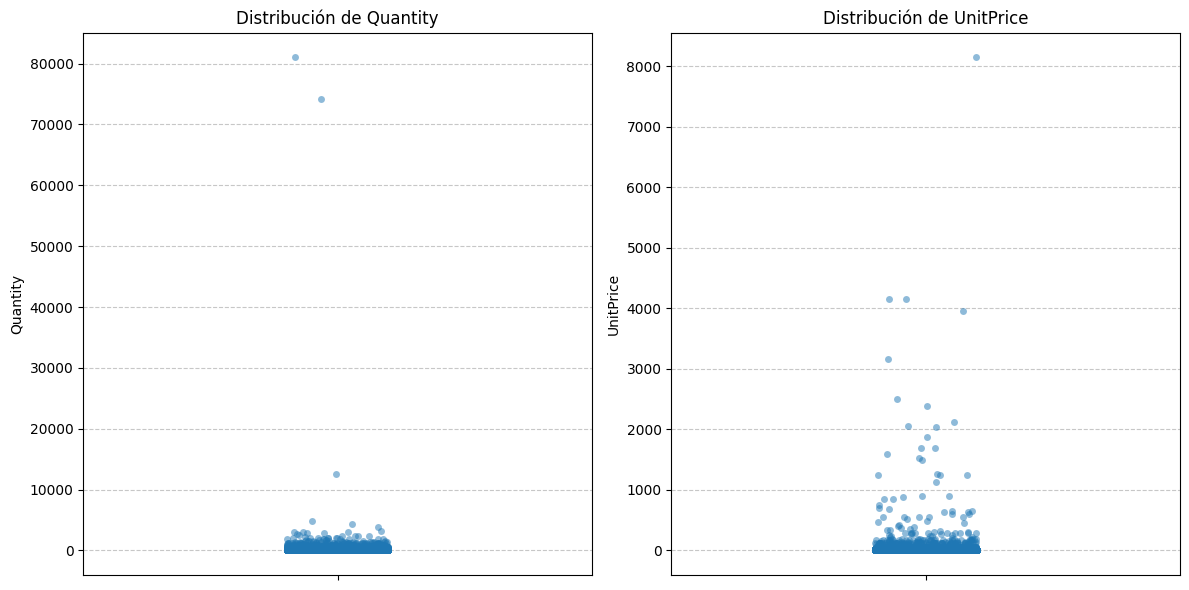

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.stripplot(y=onlineRetail['Quantity'], alpha=0.5)
plt.title('Distribución de Quantity')
plt.ylabel('Quantity')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.stripplot(y=onlineRetail['UnitPrice'], alpha=0.5)
plt.title('Distribución de UnitPrice')
plt.ylabel('UnitPrice')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Extraemos el máximo y minímo de la cantidad y precio unitario (con outlaiers)

In [ ]:
min_quantity = onlineRetail['Quantity'].min()
max_quantity = onlineRetail['Quantity'].max()
min_unit_price = onlineRetail['UnitPrice'].min()
max_unit_price = onlineRetail['UnitPrice'].max()

print(f"Valor mínimo de Quantity: {min_quantity}")
print(f"Valor máximo de Quantity: {max_quantity}")
print(f"Valor mínimo de UnitPrice: {min_unit_price}")
print(f"Valor máximo de UnitPrice: {max_unit_price}")

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995
Valor mínimo de UnitPrice: 0.0
Valor máximo de UnitPrice: 8142.75


Eliminamos las filas que contengan un precio unitario y cantidad no válido:

In [ ]:
# inplace = True modifica el Dataframe original
onlineRetail.query("Quantity > 0 and UnitPrice > 0", inplace=True)

Verificamos:

In [ ]:
mostrarCantidadNegativa(onlineRetail)

,Quantity


In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail)

,UnitPrice


Verificamos el gráfico:

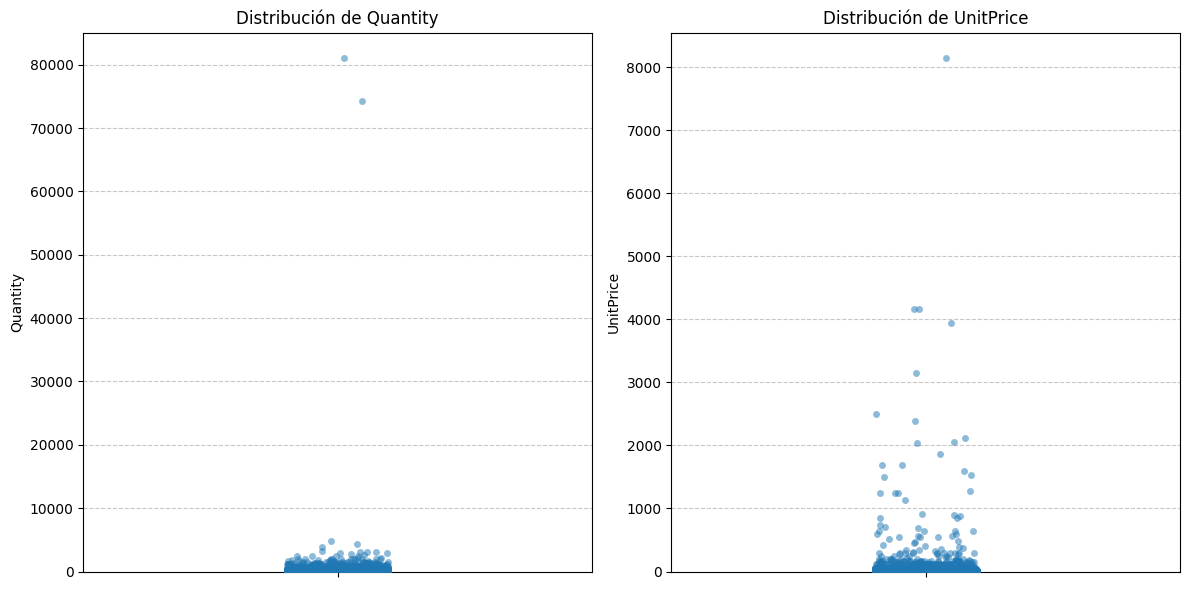

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.stripplot(y=onlineRetail['Quantity'], alpha=0.5)
plt.title('Distribución de Quantity')
plt.ylabel('Quantity')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.subplot(1, 2, 2)
sns.stripplot(y=onlineRetail['UnitPrice'], alpha=0.5)
plt.title('Distribución de UnitPrice')
plt.ylabel('UnitPrice')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Verificamos los nuevos mínimos y maximos:

In [ ]:
min_quantity = onlineRetail['Quantity'].min()
max_quantity = onlineRetail['Quantity'].max()
min_unit_price = onlineRetail['UnitPrice'].min()
max_unit_price = onlineRetail['UnitPrice'].max()

print(f"Valor mínimo de Quantity: {min_quantity}")
print(f"Valor máximo de Quantity: {max_quantity}")
print(f"Valor mínimo de UnitPrice: {min_unit_price}")
print(f"Valor máximo de UnitPrice: {max_unit_price}")

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995
Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 8142.75


#### Evaluando si pueden existir fechas inconsistentes

In [ ]:
# Obtener el valor mínimo y máximo de InvoiceDate
fechaMinima = onlineRetail['InvoiceDate'].min()
fechaMaxima = onlineRetail['InvoiceDate'].max()

print(f"Fecha mínima de InvoiceDate: {fechaMinima}")
print(f"Fecha máxima de InvoiceDate: {fechaMaxima}")

# Verificar si hay fechas inválidas
fechasInvalidas = pd.to_datetime(onlineRetail['InvoiceDate'], errors='coerce').isnull().sum()

if fechasInvalidas > 0:
    print(f"\nSe encontraron {fechasInvalidas} fechas inválidas en la columna InvoiceDate.")
else:
    print("\nNo se encontraron fechas inválidas en la columna InvoiceDate.")

Fecha mínima de InvoiceDate: 1/10/2011 10:32
Fecha máxima de InvoiceDate: 9/9/2011 9:52

No se encontraron fechas inválidas en la columna InvoiceDate.


#### Verificar si existen paises inconsistentes

Usamos GeoPandas  

In [ ]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip")

Validamos paises que esten dentro de zip

In [ ]:
def ValidarPais(pais, world):
    # set para búsqueda rápida
    paises_validos = set(world['ADMIN'].unique())
    return pais in paises_validos

Analizamos los paises del dataset

In [ ]:
def AnalizarPaises(df, world, columnaPais="Country"):
    paises_validos = set(world['ADMIN'].unique())
    invalidos = df.loc[~df[columnaPais].isin(paises_validos), columnaPais]
    invalidos_contados = invalidos.value_counts().to_dict()
    return invalidos_contados

Obtenemos los paises no reconocidos

In [ ]:
PaisesNoReconocidos = AnalizarPaises(onlineRetail, world)
if not PaisesNoReconocidos:
    print("No se encontraron países no reconocidos.")
else:
    for pais, contador in PaisesNoReconocidos.items():
        print(f'{pais}: {contador}')

EIRE: 7226
Channel Islands: 747
Unspecified: 241
USA: 179
European Community: 60
RSA: 57
Czech Republic: 25


EIRE (7890) → Es Irlanda (se usaba “Eire” antiguamente para referirse al país en inglés). Se puede considerar válido, solo que el nombre está en un formato distinto.

Channel Islands (748) → Son las Islas del Canal (Jersey, Guernsey…), dependencias de la Corona británica, no un país independiente.

Unspecified (446) → Registros donde el país no fue indicado → se suelen eliminar porque no aportan información.

USA (179) → Pocos pedidos desde Estados Unidos → válido, aunque marginal.

European Community (60) → Un valor genérico, no un país → se suelen eliminar porque no aportan información.

RSA (57) → Es República de Sudáfrica (Republic of South Africa).

Czech Republic (25) → Válido, aunque con muy pocos registros.

Normalizamos los paises

In [ ]:
def normalizarPaises(dataFrame, columnaPais):
    mapeoPaises = {
        'EIRE': 'Ireland',
        'Channel Islands': 'United Kingdom',
        'Unspecified': "Others",
        'USA': 'United States of America',
        'European Community': "Others",
        'RSA': 'South Africa',
        'Czech Republic': 'Czechia'
    }
    dataFrame[columnaPais] = dataFrame[columnaPais].replace(mapeoPaises)

Ejecutamos

In [ ]:
normalizarPaises(onlineRetail, 'Country')

Eliminamos los registros "Others", dado que no tienen un paies de referencia.

In [ ]:
onlineRetail.drop(onlineRetail[onlineRetail['Country'] == 'Others'].index, inplace=True)

Verificamos:

In [ ]:
PaisesNoReconocidos = AnalizarPaises(onlineRetail, world)
if not PaisesNoReconocidos:
    print("No se encontraron países no reconocidos.")
else:
    for pais, contador in PaisesNoReconocidos.items():
        print(f'{pais}: {contador}')

No se encontraron países no reconocidos.


Obtenemos la cantidad de paises involucrados en el dataset

In [ ]:
num_paises = onlineRetail['Country'].nunique()
print(f"Número de países únicos en el DataFrame: {num_paises}")

Número de países únicos en el DataFrame: 34


## Análisis Exploratorio de datos (EDA)

### ¿Entre que rangos estan los datos?

In [ ]:
def visualizar_minmax_box(df, columna):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[columna], color="lightblue")
    plt.title(f"Valores extremos de {columna}")
    plt.show()
    print(f"Valor mínimo de {columna}: {df[columna].min()}")
    print(f"Valor máximo de {columna}: {df[columna].max()}")

In [ ]:
def visualizar_minmax_hist(df, columna):
    plt.figure(figsize=(8,5))
    sns.histplot(df[columna], bins=50, color="skyblue")
    plt.axvline(df[columna].min(), color='red', linestyle='--', label=f"Min: {df[columna].min()}")
    plt.axvline(df[columna].max(), color='green', linestyle='--', label=f"Max: {df[columna].max()}")
    plt.title(f"Distribución de {columna}")
    plt.legend()
    plt.show()
    print(f"Valor mínimo de {columna}: {df[columna].min()}")
    print(f"Valor máximo de {columna}: {df[columna].max()}")

Podemos analizar entre que rangos estan los valores de la cantidad de un producto



Ejecutamos:

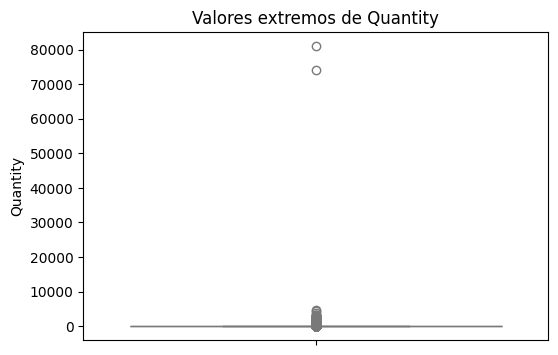

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995


In [ ]:
visualizar_minmax_box(onlineRetail, "Quantity")

Podemos analizar entre que rangos estan los valores de la cantidad del precio unitario de un producto

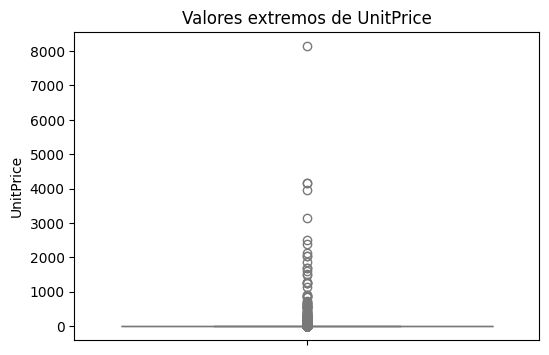

Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 8142.75


In [ ]:
visualizar_minmax_box(onlineRetail, "UnitPrice")

Podemos analizar entre que rangos estan los valores de la cantidad del precio unitario del código de un cliente

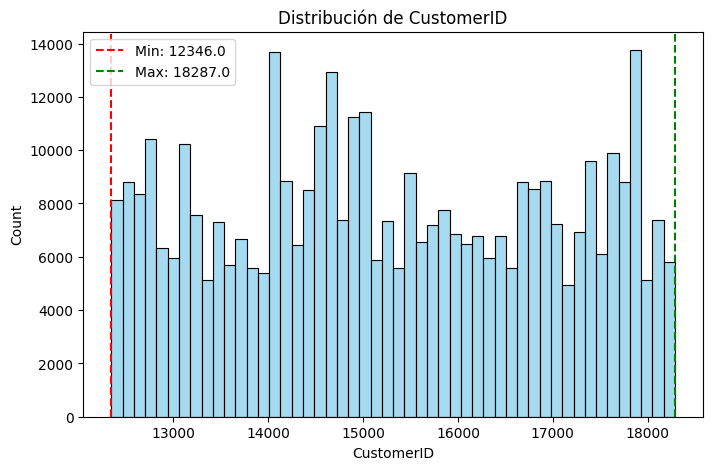

Valor mínimo de CustomerID: 12346.0
Valor máximo de CustomerID: 18287.0


In [ ]:
visualizar_minmax_hist(onlineRetail, "CustomerID")

Podemos analizar entre que rangos estan los valores de la fecha de una factura

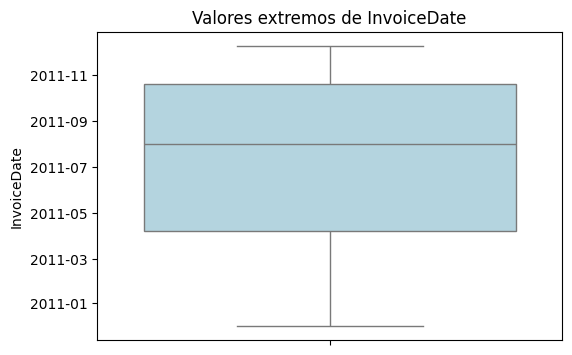

Valor mínimo de InvoiceDate: 2010-12-01 08:26:00
Valor máximo de InvoiceDate: 2011-12-09 12:50:00


In [ ]:
onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])
visualizar_minmax_box(onlineRetail, "InvoiceDate")

Podemos analizar los paises involucrados en el dataset

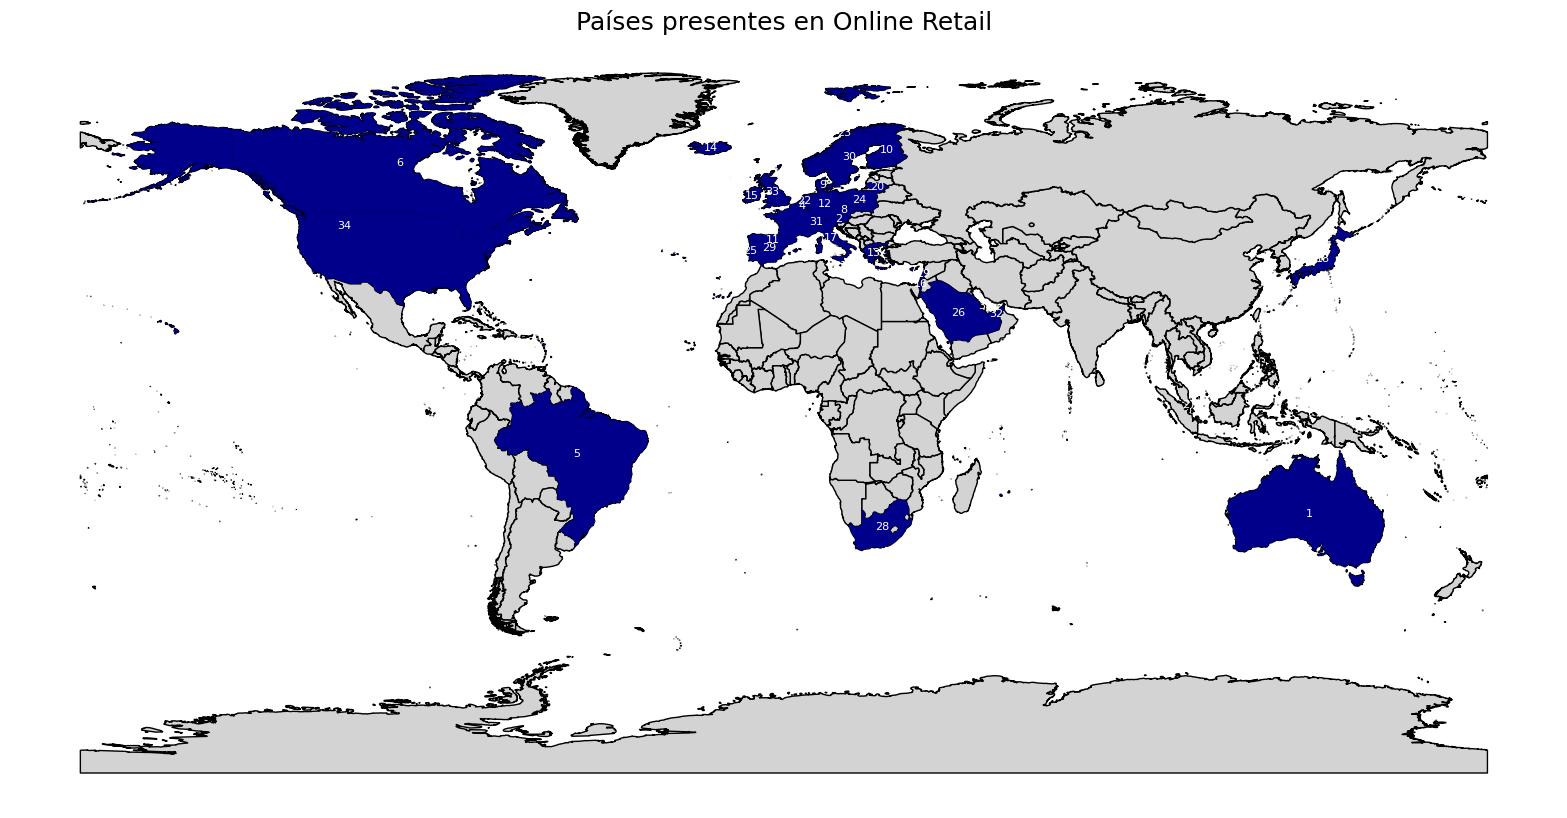

In [ ]:
countries = onlineRetail['Country'].unique()
world["present"] = world["ADMIN"].isin(countries)
world_present = world[world["present"]].copy()
world_present = world_present.sort_values("ADMIN").reset_index(drop=True)
world_present['label'] = range(1, len(world_present) + 1)
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")
world_present.plot(ax=ax, color="darkblue")
for index, row in world_present.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        text=int(row['label']),
        xy=(centroid.x, centroid.y),
        ha='center', va='center',
        fontsize=8, color='white'
    )

plt.title("Países presentes en Online Retail", fontsize=18)
plt.axis("off")
plt.show()

# Mostrar asignación en consola (alfabética)
#print("\nAsignación de números a países (orden alfabético):")
#for index, row in world_present.iterrows():
#    print(f"{int(row['label'])}: {row['ADMIN']}")

# Verificar faltantes (si es que aún hay)
#world_countries_list = world['ADMIN'].unique().tolist()
#countries_not_in_world = [c for c in countries if c not in world_countries_list]
#print(f"\nPaíses en onlineRetail no encontrados en el mapa mundial GeoDataFrame: {countries_not_in_world}")

### Análisis describe

In [ ]:
onlineRetail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392391.000000,392391,392391.000000,392391.000000
mean,13.123945,2011-07-10 19:21:44.407134976,3.125596,15288.825906
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 10:33:00,1.250000,13956.000000
50%,6.000000,2011-07-31 12:44:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16792.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.561829,NaN,22.250134,1713.349352


### Análisis de outlaiers

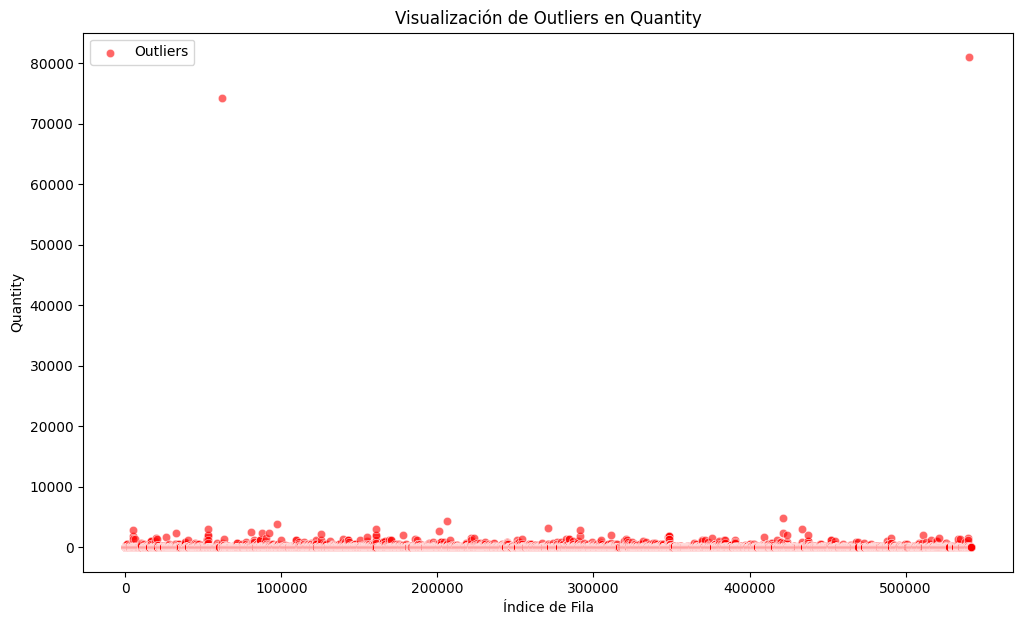

In [ ]:
if 'onlineRetail_for_plotting' not in locals() and 'onlineRetail' in locals():
    onlineRetail_for_plotting = onlineRetail.copy()
    onlineRetail_for_plotting = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')
    onlineRetail_for_plotting.dropna(inplace=True)
    onlineRetail_for_plotting.query("Quantity > 0 and UnitPrice > 0", inplace=True)
# Calcular outliers en Quantity
Q1_q = onlineRetail_for_plotting['Quantity'].quantile(0.25)
Q3_q = onlineRetail_for_plotting['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q
outliers_q = onlineRetail_for_plotting[(onlineRetail_for_plotting['Quantity'] < lower_bound_q) |
                                       (onlineRetail_for_plotting['Quantity'] > upper_bound_q)]
plt.figure(figsize=(12, 7))
sns.scatterplot(x=outliers_q.index, y=outliers_q['Quantity'], color='red', label='Outliers', alpha=0.6)
plt.title('Visualización de Outliers en Quantity')
plt.xlabel('Índice de Fila')
plt.ylabel('Quantity')
plt.legend()
plt.show()


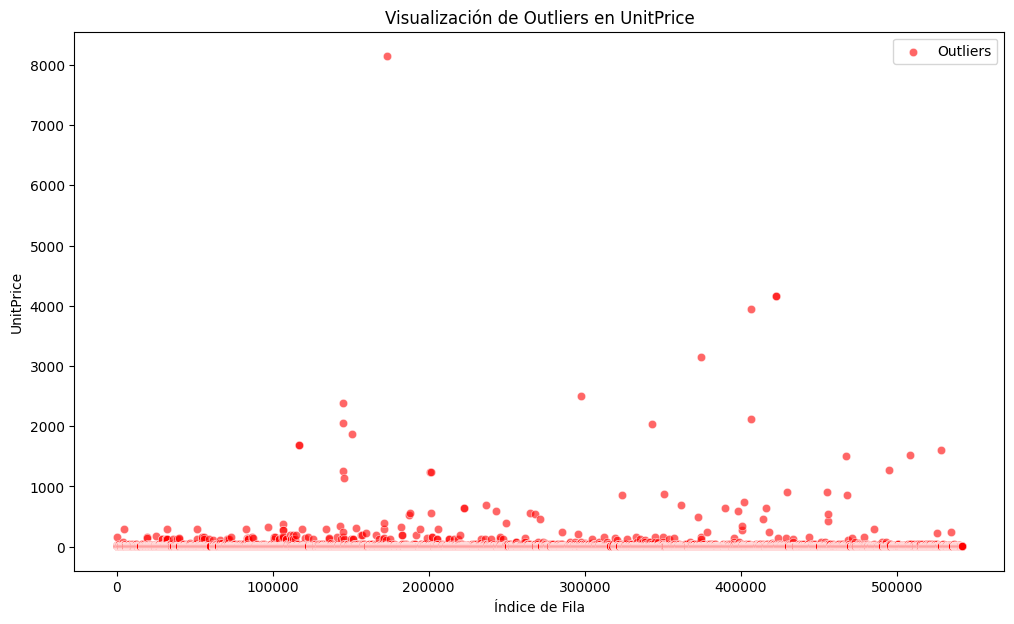

In [ ]:
if 'onlineRetail_for_plotting' not in locals() and 'onlineRetail' in locals():
    onlineRetail_for_plotting = onlineRetail.copy()
    onlineRetail_for_plotting = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')
    onlineRetail_for_plotting.dropna(inplace=True)
    onlineRetail_for_plotting.query("Quantity > 0 and UnitPrice > 0", inplace=True)
Q1_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.25)
Q3_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
outliers_p = onlineRetail_for_plotting[(onlineRetail_for_plotting['UnitPrice'] < lower_bound_p) |
                                       (onlineRetail_for_plotting['UnitPrice'] > upper_bound_p)]
plt.figure(figsize=(12, 7))
sns.scatterplot(x=outliers_p.index, y=outliers_p['UnitPrice'], color='red', label='Outliers', alpha=0.6)
plt.title('Visualización de Outliers en UnitPrice')
plt.xlabel('Índice de Fila')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

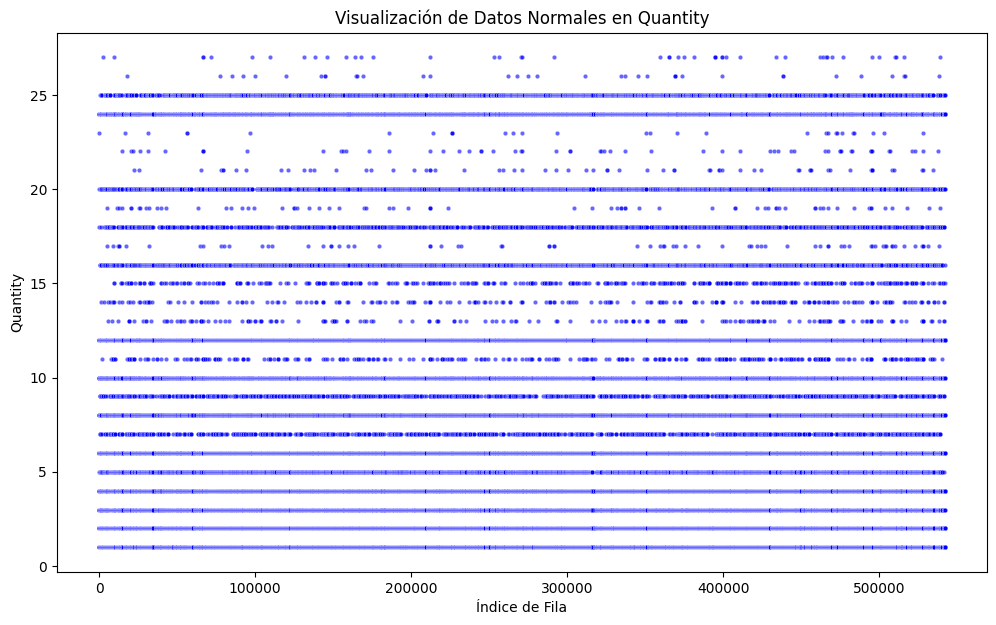

In [ ]:
Q1_q = onlineRetail_for_plotting['Quantity'].quantile(0.25)
Q3_q = onlineRetail_for_plotting['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q
normal_q = onlineRetail_for_plotting[(onlineRetail_for_plotting['Quantity'] >= lower_bound_q) &
                                     (onlineRetail_for_plotting['Quantity'] <= upper_bound_q)]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=normal_q.index, y=normal_q['Quantity'],
    alpha=0.6, color='blue', s=10, legend=False  # leyenda desactivada
)
plt.title('Visualización de Datos Normales en Quantity')
plt.xlabel('Índice de Fila')
plt.ylabel('Quantity')
plt.show()

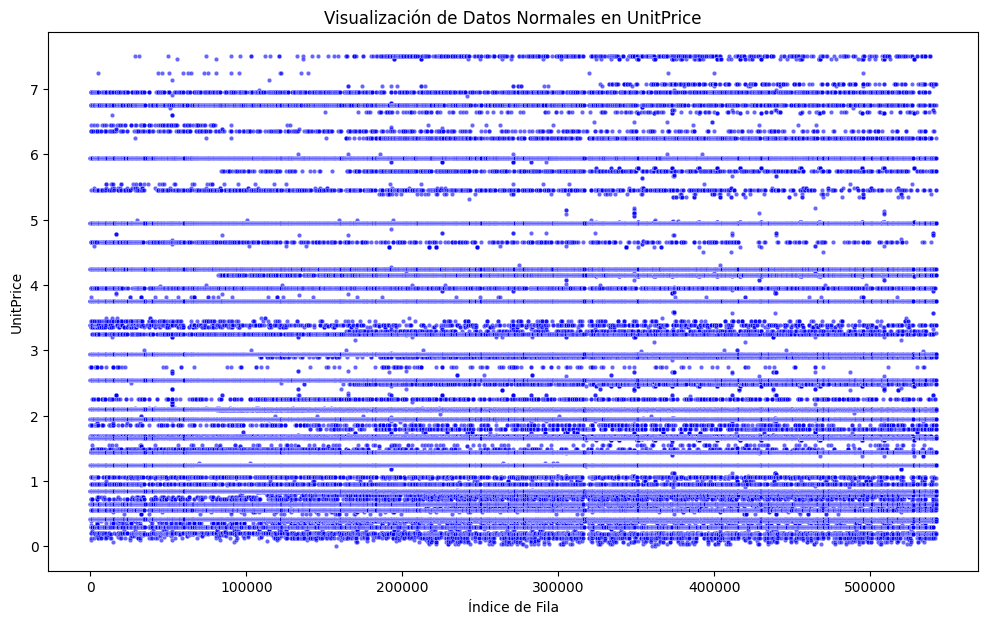

In [ ]:
Q1_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.25)
Q3_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
normal_p = onlineRetail_for_plotting[(onlineRetail_for_plotting['UnitPrice'] >= lower_bound_p) &
                                     (onlineRetail_for_plotting['UnitPrice'] <= upper_bound_p)]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=normal_p.index, y=normal_p['UnitPrice'],
    alpha=0.6, color='blue', s=10, legend=False  # leyenda desactivada
)
plt.title('Visualización de Datos Normales en UnitPrice')
plt.xlabel('Índice de Fila')
plt.ylabel('UnitPrice')
plt.show()

Problemas: paper 3

- No se menciona por qué eligieron el método IQR sobre otros
- No se menciona consideraciones de negocio (como mantener clientes VIP)
- No se comparan con otros métodos de detección de outliers

In [ ]:
# Remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
columnas_numericas = ['Quantity', 'UnitPrice']
df_clean = onlineRetail.copy()

for columna in columnas_numericas:
    df_clean = remove_outlier(df_clean, columna)
    print(f"Outliers eliminados de {columna}")

Outliers eliminados de Quantity
Outliers eliminados de UnitPrice


In [ ]:
verificarNulos(df_clean)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [ ]:
mostrarDuplicados(df_clean)

Cantidad de filas duplicadas: 0


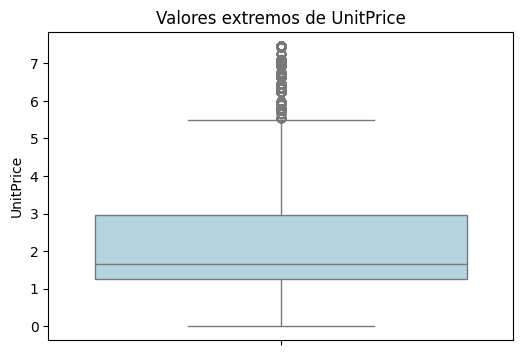

Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 7.46


In [ ]:
visualizar_minmax_box(df_clean, "UnitPrice")

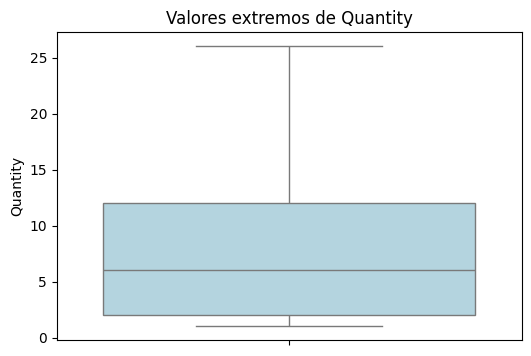

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 26


In [ ]:
visualizar_minmax_box(df_clean, "Quantity")

In [ ]:
onlineRetail.head(18)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Análisis temporal previo al clustering
Segmentación por cohortes temporales
Transformaciones logarítmicas para variables asimétricas
Validación cruzada temporal para evaluar estabilidad de clusters

/tmp/ipython-input-2299944963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')


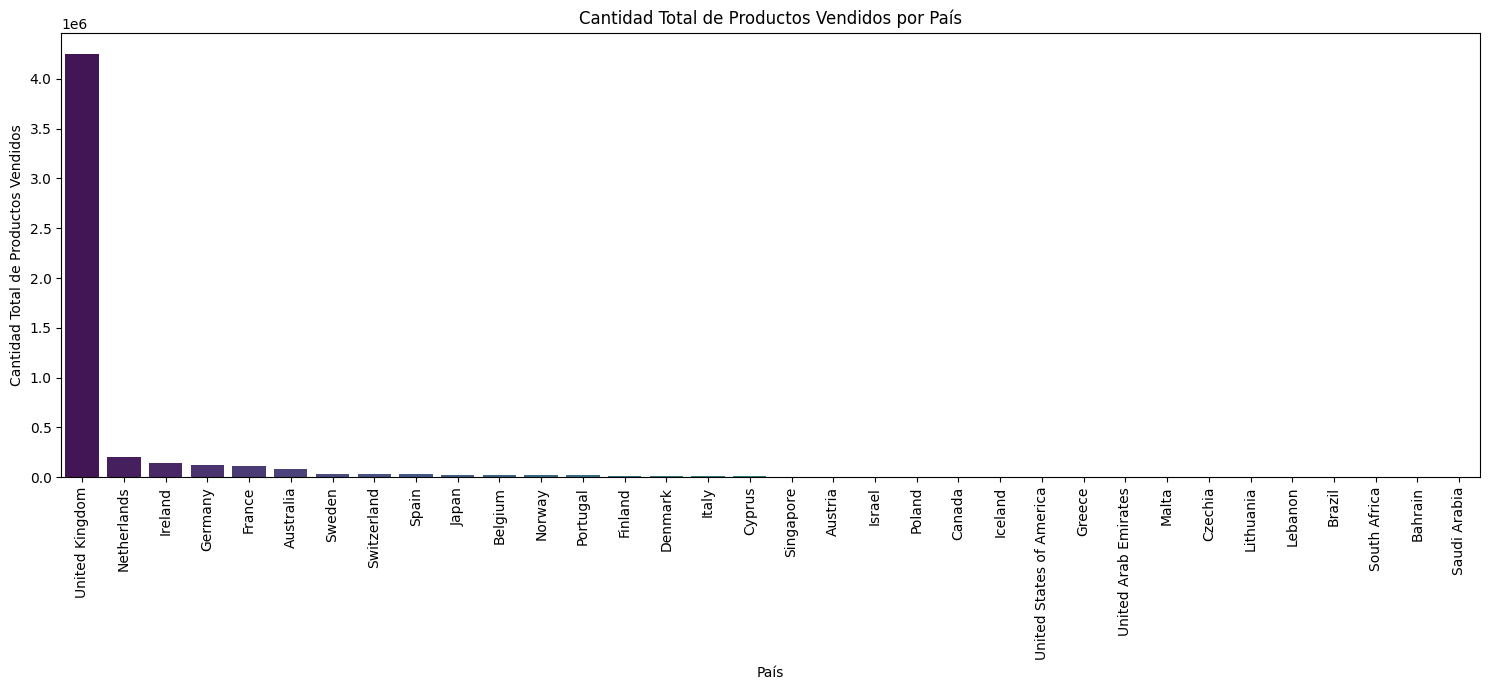


Total de productos vendidos por país:
United Kingdom: 4250790
Netherlands: 200361
Ireland: 140133
Germany: 119154
France: 111428
Australia: 83891
Sweden: 36078
Switzerland: 30082
Spain: 27933
Japan: 26016
Belgium: 23237
Norway: 19336
Portugal: 16095
Finland: 10704
Denmark: 8235
Italy: 8112
Cyprus: 6340
Singapore: 5241
Austria: 4881
Israel: 4043
Poland: 3684
Canada: 2763
Iceland: 2458
United States of America: 2458
Greece: 1557
United Arab Emirates: 982
Malta: 970
Czechia: 671
Lithuania: 652
Lebanon: 386
Brazil: 356
South Africa: 351
Bahrain: 260
Saudi Arabia: 80


In [ ]:
# Group by Country and sum Quantity
sales_by_country = onlineRetail.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Visualize total quantity sold by country
plt.figure(figsize=(15, 7))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Cantidad Total de Productos Vendidos')
plt.title('Cantidad Total de Productos Vendidos por País')
plt.tight_layout()
plt.show()

# Print total quantity sold for each country
print("\nTotal de productos vendidos por país:")
for country, quantity in sales_by_country.items():
    print(f"{country}: {quantity}")

/tmp/ipython-input-2240755953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_stockcodes_by_country.index, y=unique_stockcodes_by_country.values, palette='viridis')


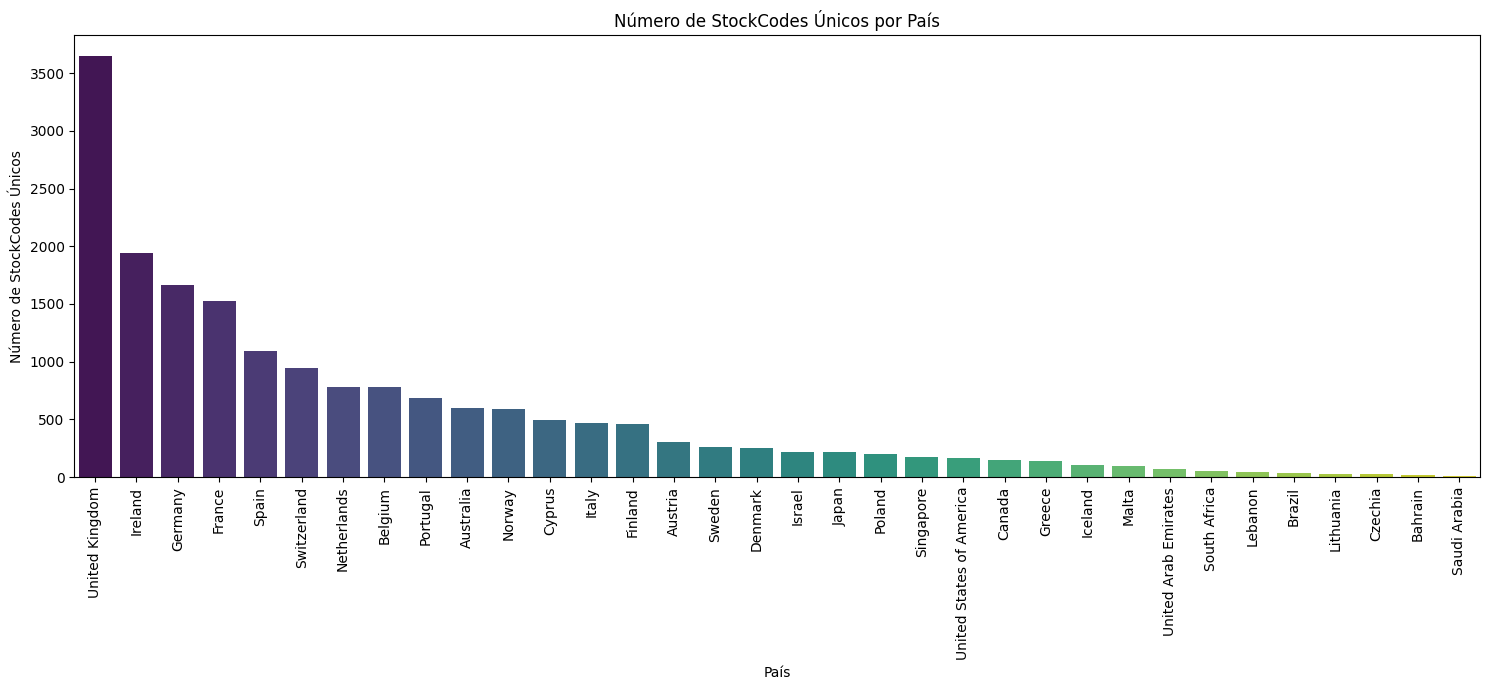


Número de StockCodes únicos por país:
United Kingdom: 3645
Ireland: 1943
Germany: 1664
France: 1522
Spain: 1091
Switzerland: 947
Netherlands: 782
Belgium: 777
Portugal: 686
Australia: 599
Norway: 591
Cyprus: 498
Italy: 473
Finland: 458
Austria: 306
Sweden: 261
Denmark: 251
Israel: 219
Japan: 215
Poland: 204
Singapore: 178
United States of America: 163
Canada: 147
Greece: 138
Iceland: 103
Malta: 99
United Arab Emirates: 68
South Africa: 57
Lebanon: 45
Brazil: 32
Lithuania: 29
Czechia: 25
Bahrain: 16
Saudi Arabia: 9


In [ ]:
# Calculate the number of unique StockCodes per country
unique_stockcodes_by_country = onlineRetail.groupby('Country')['StockCode'].nunique().sort_values(ascending=False)

# Visualize the number of unique StockCodes per country
plt.figure(figsize=(15, 7))
sns.barplot(x=unique_stockcodes_by_country.index, y=unique_stockcodes_by_country.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Número de StockCodes Únicos')
plt.title('Número de StockCodes Únicos por País')
plt.tight_layout()
plt.show()

# Print the number of unique StockCodes for each country
print("\nNúmero de StockCodes únicos por país:")
for country, count in unique_stockcodes_by_country.items():
    print(f"{country}: {count}")

¿Qué artículo se compró con más frecuencia ?

/tmp/ipython-input-1742123102.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items_for_bar_plot.index, y=top_items_for_bar_plot.values, palette='viridis')


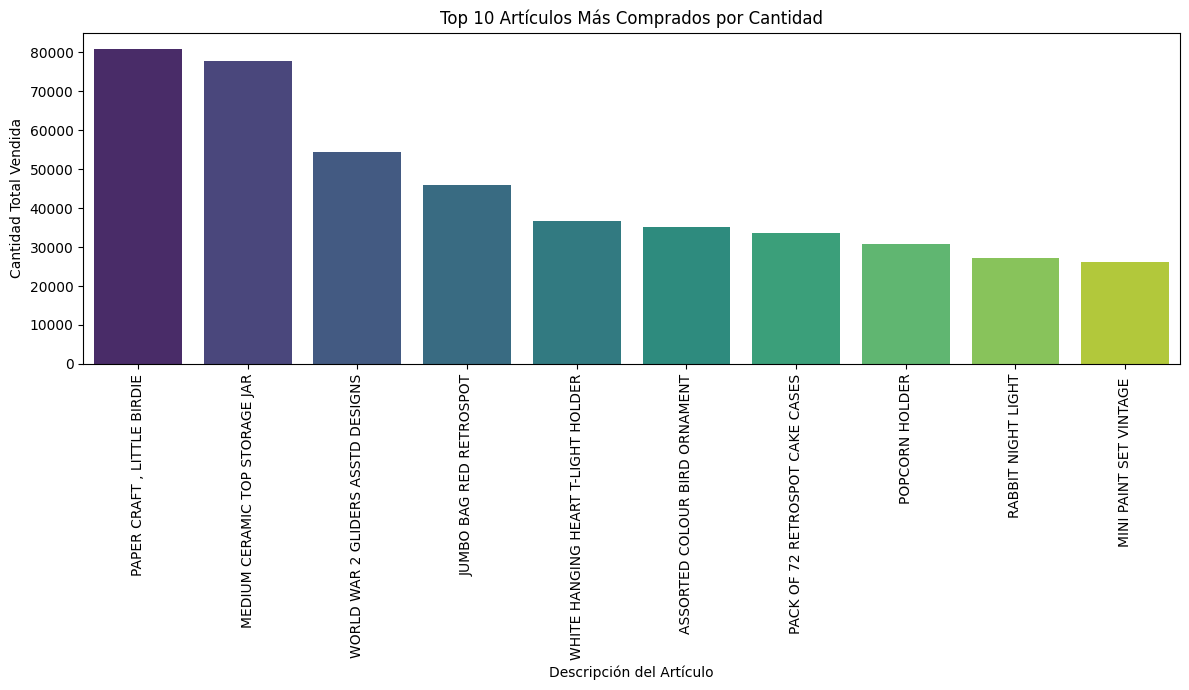

Top 10 Artículo(s) comprado(s) con más frecuencia:


,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35241
PACK OF 72 RETROSPOT CAKE CASES,33646
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


In [ ]:
# Group by Description and sum the Quantity
most_frequent_item = onlineRetail.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Select the top N items for the bar plot
top_n = 10 # You can adjust this number
top_items_for_bar_plot = most_frequent_item.head(top_n)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_items_for_bar_plot.index, y=top_items_for_bar_plot.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Descripción del Artículo')
plt.ylabel('Cantidad Total Vendida')
plt.title(f'Top {top_n} Artículos Más Comprados por Cantidad')
plt.tight_layout()
plt.show()

# Display the top items
print(f"Top {top_n} Artículo(s) comprado(s) con más frecuencia:")
display(top_items_for_bar_plot)